https://archive.ics.uci.edu/dataset/563/iranian+churn+dataset

# FNN

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('/Customer Churn.csv')
data.head()


,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [29]:
# Separate features and target
X = data.drop('Churn', axis=1)
y = data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y.squeeze(), test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Classification Model (Churn Prediction)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6930 - loss: 0.5335 - precision: 0.1745 - recall: 0.2092 - val_accuracy: 0.9016 - val_loss: 0.2429 - val_precision: 1.0000 - val_recall: 0.3737
Epoch 2/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8903 - loss: 0.2524 - precision: 0.8102 - recall: 0.4580 - val_accuracy: 0.9063 - val_loss: 0.2217 - val_precision: 0.9167 - val_recall: 0.4444
Epoch 3/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9026 - loss: 0.2196 - precision: 0.8470 - recall: 0.4924 - val_accuracy: 0.9143 - val_loss: 0.2102 - val_precision: 1.0000 - val_recall: 0.4545
Epoch 4/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9049 - loss: 0.2041 - precision: 0.8250 - recall: 0.4819 - val_accuracy: 0.9238 - val_loss: 0.2037 - val_precision: 0.7802 - val_recall: 0.7172
Epoch 5/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9120 - loss: 0.1916 - precision: 0.8033 - recall: 0.5341 - val_accuracy: 0.9349 - val_loss: 0.1872 - val_precis

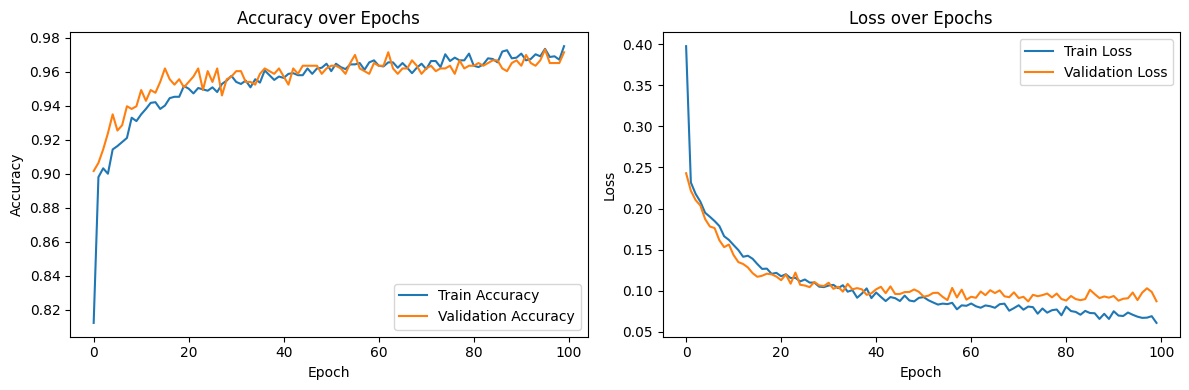

In [30]:
# Classification Model for Churn Prediction
def build_classification_model(input_shape):
    model = Sequential([
        Dense(128, activation='relu', input_shape=input_shape),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')  # Single output for binary classification
    ])

    model.compile(optimizer=Adam(learning_rate=0.001),
                 loss='binary_crossentropy',
                 metrics=['accuracy',
                         tf.keras.metrics.Precision(name='precision'),
                         tf.keras.metrics.Recall(name='recall')])
    return model

# Build and train the classification model
class_model = build_classification_model((X_train.shape[1],))
class_history = class_model.fit(X_train, y_train,
                              validation_data=(X_test, y_test),
                              epochs=100,
                              batch_size=32,
                              verbose=1)

# Evaluate classification model
y_pred_class = (class_model.predict(X_test) > 0.5).astype("int32")

print("\nClassification Model Performance:")
print(classification_report(y_test, y_pred_class))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_class))
print(f"Accuracy: {accuracy_score(y_test, y_pred_class):.4f}")

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(class_history.history['accuracy'], label='Train Accuracy')
plt.plot(class_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(class_history.history['loss'], label='Train Loss')
plt.plot(class_history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

Epoch 1/150


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 489416.1562 - mae: 469.6308 - mse: 489416.1562 - val_loss: 426272.8125 - val_mae: 433.2084 - val_mse: 426272.8125
Epoch 2/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 460921.5625 - mae: 446.1799 - mse: 460921.5625 - val_loss: 292907.7188 - val_mae: 329.3663 - val_mse: 292907.7188
Epoch 3/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 252005.9531 - mae: 306.1995 - mse: 252005.9531 - val_loss: 85109.7734 - val_mae: 217.4319 - val_mse: 85109.7734
Epoch 4/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 89837.2812 - mae: 224.0435 - mse: 89837.2812 - val_loss: 32342.5625 - val_mae: 143.5600 - val_mse: 32342.5625
Epoch 5/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 35963.7031 - mae: 144.3602 - mse: 35963.7031 - val_loss: 13484.0303 - val_mae: 92.3282 - val_mse: 13484.0303
Epoch 6/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 18460.5879 - mae: 102.3045 - mse: 18460.5879 - val_loss: 7570.9570 - val_mae: 66.2641 - val_mse: 7

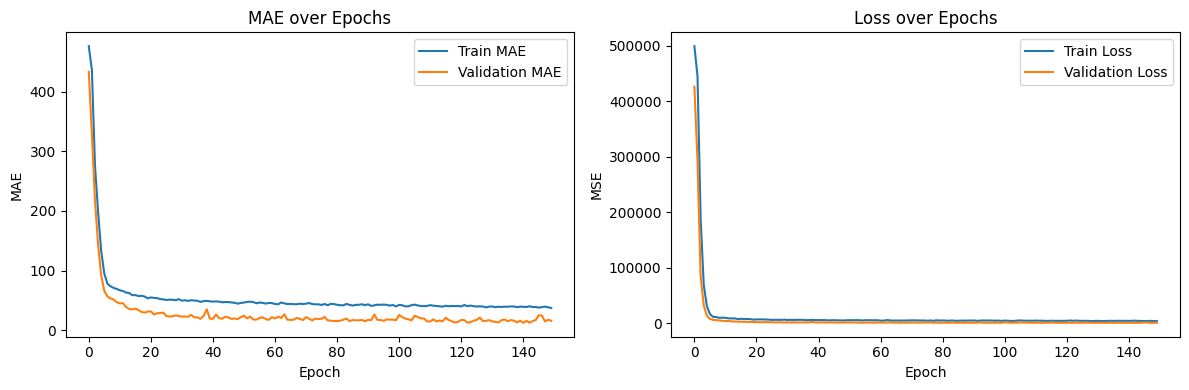

In [31]:
# For the prediction model, we'll predict 'Customer Value'
# Separate features and target for regression
X_reg = data.drop('Customer Value', axis=1)
y_reg = data['Customer Value']

# Split data into train and test sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42)

# Standardize the features
scaler_reg = StandardScaler()
X_train_reg = scaler_reg.fit_transform(X_train_reg)
X_test_reg = scaler_reg.transform(X_test_reg)

# Prediction Model for Customer Value
def build_prediction_model(input_shape):
    model = Sequential([
        Dense(256, activation='relu', input_shape=input_shape),
        Dropout(0.4),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1)  # Single output for regression
    ])

    model.compile(optimizer=Adam(learning_rate=0.0005),
                 loss='mean_squared_error',
                 metrics=['mae', 'mse'])
    return model

# Build and train the prediction model
pred_model = build_prediction_model((X_train_reg.shape[1],))
pred_history = pred_model.fit(X_train_reg, y_train_reg,
                            validation_data=(X_test_reg, y_test_reg),
                            epochs=150,
                            batch_size=64,
                            verbose=1)

# Evaluate prediction model
y_pred_reg = pred_model.predict(X_test_reg)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("\nPrediction Model Performance:")
print(f"MAE: {mean_absolute_error(y_test_reg, y_pred_reg):.4f}")
print(f"MSE: {mean_squared_error(y_test_reg, y_pred_reg):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_reg, y_pred_reg)):.4f}")
print(f"R2 Score: {r2_score(y_test_reg, y_pred_reg):.4f}")

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(pred_history.history['mae'], label='Train MAE')
plt.plot(pred_history.history['val_mae'], label='Validation MAE')
plt.title('MAE over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(pred_history.history['loss'], label='Train Loss')
plt.plot(pred_history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.tight_layout()
plt.show()

Confusion Matrix for Classification Model (Churn Prediction)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


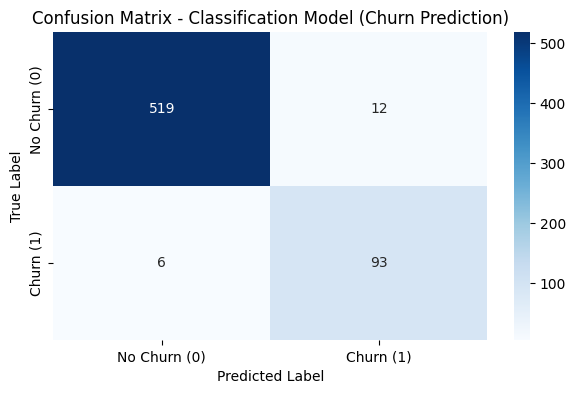

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get predictions from classification model
y_pred_class = (class_model.predict(X_test) > 0.5).astype("int32")

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_class)

# Plot confusion matrix
plt.figure(figsize=(7, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn (0)', 'Churn (1)'],
            yticklabels=['No Churn (0)', 'Churn (1)'])
plt.title('Confusion Matrix - Classification Model (Churn Prediction)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Prediction Model (Customer Value Regression)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


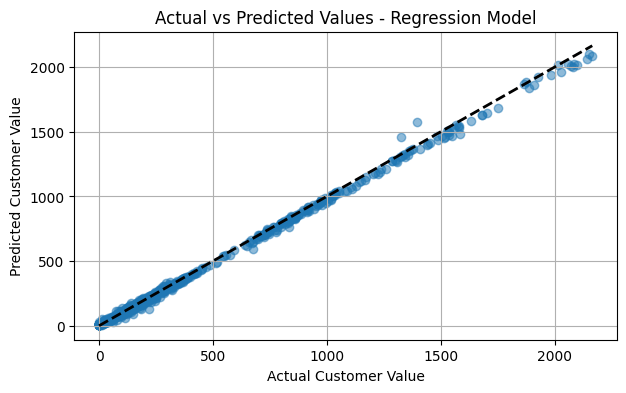

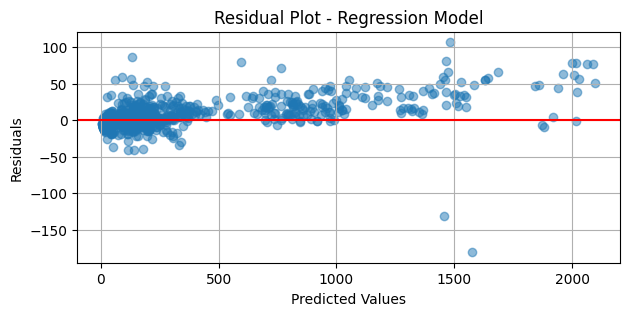

In [33]:
# Get predictions from regression model
y_pred_reg = pred_model.predict(X_test_reg).flatten()

# Create scatter plot of actual vs predicted values
plt.figure(figsize=(7, 4))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.5)
plt.plot([y_test_reg.min(), y_test_reg.max()],
         [y_test_reg.min(), y_test_reg.max()],
         'k--', lw=2)  # Diagonal line
plt.xlabel('Actual Customer Value')
plt.ylabel('Predicted Customer Value')
plt.title('Actual vs Predicted Values - Regression Model')
plt.grid(True)
plt.show()

# You can also create a residual plot
residuals = y_test_reg - y_pred_reg
plt.figure(figsize=(7, 3))
plt.scatter(y_pred_reg, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot - Regression Model')
plt.grid(True)
plt.show()

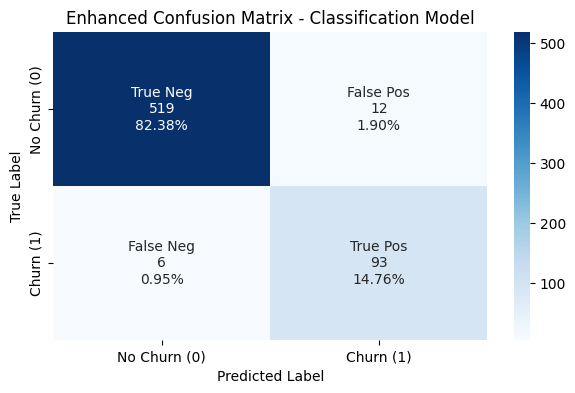

In [34]:
# Enhanced confusion matrix with percentages
plt.figure(figsize=(7, 4))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues',
            xticklabels=['No Churn (0)', 'Churn (1)'],
            yticklabels=['No Churn (0)', 'Churn (1)'])
plt.title('Enhanced Confusion Matrix - Classification Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [35]:
# prompt: perform regularization for classification model using L1 , L2 and (L1 and L2) regularization

from tensorflow.keras.regularizers import l1, l2, l1_l2

def build_classification_model_with_regularization(input_shape, regularization_type='l2', l1_reg=0.01, l2_reg=0.01):
    model = Sequential([
        Dense(128, activation='relu', input_shape=input_shape,
              kernel_regularizer=get_regularizer(regularization_type, l1_reg, l2_reg)),
        Dropout(0.3),
        Dense(64, activation='relu', kernel_regularizer=get_regularizer(regularization_type, l1_reg, l2_reg)),
        Dropout(0.2),
        Dense(32, activation='relu', kernel_regularizer=get_regularizer(regularization_type, l1_reg, l2_reg)),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

def get_regularizer(regularization_type, l1_reg, l2_reg):
    if regularization_type == 'l1':
        return l1(l1_reg)
    elif regularization_type == 'l2':
        return l2(l2_reg)
    elif regularization_type == 'l1_l2':
        return l1_l2(l1=l1_reg, l2=l2_reg)
    else:
        return None


# Example usage with L1 regularization
class_model_l1 = build_classification_model_with_regularization((X_train.shape[1],), regularization_type='l1')
class_history_l1 = class_model_l1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=1)


# Example usage with L2 regularization
class_model_l2 = build_classification_model_with_regularization((X_train.shape[1],), regularization_type='l2')
class_history_l2 = class_model_l2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=1)


# Example usage with L1 and L2 regularization
class_model_l1_l2 = build_classification_model_with_regularization((X_train.shape[1],), regularization_type='l1_l2')
class_history_l1_l2 = class_model_l1_l2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=1)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7643 - loss: 10.1176 - val_accuracy: 0.8429 - val_loss: 4.9568
Epoch 2/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8474 - loss: 3.8119 - val_accuracy: 0.8429 - val_loss: 1.3342
Epoch 3/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8457 - loss: 1.0368 - val_accuracy: 0.8429 - val_loss: 0.5574
Epoch 4/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8389 - loss: 0.5344 - val_accuracy: 0.8429 - val_loss: 0.4707
Epoch 5/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8340 - loss: 0.4924 - val_accuracy: 0.8429 - val_loss: 0.4535
Epoch 6/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8489 - loss: 0.4554 - val_accuracy: 0.8429 - val_loss: 0.4403
Epoch 7/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8496 - loss: 0.4469 - val_accuracy: 0.8429 - val_loss: 0.4286
Epoch 8/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8443 - loss: 0.4424 - val_accuracy: 0.8429 - val_loss: 0.

In [36]:
# prompt: Regularized Classification Model Performance:

# Evaluate the models and print the results
def evaluate_model(model, history, model_name):
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    print(f"\n{model_name} Model Performance:")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

evaluate_model(class_model_l1, class_history_l1, "L1 Regularized")
evaluate_model(class_model_l2, class_history_l2, "L2 Regularized")
evaluate_model(class_model_l1_l2, class_history_l1_l2, "L1_L2 Regularized")


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

L1 Regularized Model Performance:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       531
           1       0.00      0.00      0.00        99

    accuracy                           0.84       630
   macro avg       0.42      0.50      0.46       630
weighted avg       0.71      0.84      0.77       630

Accuracy: 0.8429
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



L2 Regularized Model Performance:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       531
           1       1.00      0.52      0.68        99

    accuracy                           0.92       630
   macro avg       0.96      0.76      0.82       630
weighted avg       0.93      0.92      0.91       630

Accuracy: 0.9238
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

L1_L2 Regularized Model Performance:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       531
           1       0.00      0.00      0.00        99

    accuracy                           0.84       630
   macro avg       0.42      0.50      0.46       630
weighted avg       0.71      0.84      0.77       630

Accuracy: 0.8429


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


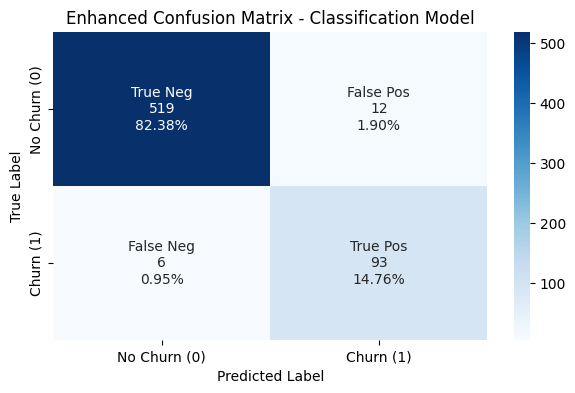

In [37]:
# prompt: Confusion Matrix:

# Confusion Matrix for Classification Model (Churn Prediction) - Enhanced with percentages

# Assuming y_test and y_pred_class are already defined from previous code

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_class)

plt.figure(figsize=(7, 4))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues',
            xticklabels=['No Churn (0)', 'Churn (1)'],
            yticklabels=['No Churn (0)', 'Churn (1)'])
plt.title('Enhanced Confusion Matrix - Classification Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [38]:
# prompt: Regularized Prediction Model (Customer Value)

def build_prediction_model_with_regularization(input_shape, regularization_type='l2', l1_reg=0.01, l2_reg=0.01):
    model = Sequential([
        Dense(256, activation='relu', input_shape=input_shape,
              kernel_regularizer=get_regularizer(regularization_type, l1_reg, l2_reg)),
        Dropout(0.4),
        Dense(128, activation='relu', kernel_regularizer=get_regularizer(regularization_type, l1_reg, l2_reg)),
        Dropout(0.3),
        Dense(64, activation='relu', kernel_regularizer=get_regularizer(regularization_type, l1_reg, l2_reg)),
        Dense(32, activation='relu', kernel_regularizer=get_regularizer(regularization_type, l1_reg, l2_reg)),
        Dense(1)  # Single output for regression
    ])

    model.compile(optimizer=Adam(learning_rate=0.0005),
                 loss='mean_squared_error',
                 metrics=['mae', 'mse'])
    return model

# Example usage with L1 regularization for the prediction model
pred_model_l1 = build_prediction_model_with_regularization((X_train_reg.shape[1],), regularization_type='l1')
pred_history_l1 = pred_model_l1.fit(X_train_reg, y_train_reg, validation_data=(X_test_reg, y_test_reg), epochs=150, batch_size=64, verbose=1)

# Example usage with L2 regularization for the prediction model
pred_model_l2 = build_prediction_model_with_regularization((X_train_reg.shape[1],), regularization_type='l2')
pred_history_l2 = pred_model_l2.fit(X_train_reg, y_train_reg, validation_data=(X_test_reg, y_test_reg), epochs=150, batch_size=64, verbose=1)

# Example usage with L1 and L2 regularization for the prediction model
pred_model_l1_l2 = build_prediction_model_with_regularization((X_train_reg.shape[1],), regularization_type='l1_l2')
pred_history_l1_l2 = pred_model_l1_l2.fit(X_train_reg, y_train_reg, validation_data=(X_test_reg, y_test_reg), epochs=150, batch_size=64, verbose=1)

# Evaluate the models and print the results for regression
def evaluate_regression_model(model, history, model_name):
    y_pred = model.predict(X_test_reg).flatten()
    print(f"\n{model_name} Model Performance:")
    print(f"MAE: {mean_absolute_error(y_test_reg, y_pred):.4f}")
    print(f"MSE: {mean_squared_error(y_test_reg, y_pred):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test_reg, y_pred)):.4f}")
    print(f"R2 Score: {r2_score(y_test_reg, y_pred):.4f}")

evaluate_regression_model(pred_model_l1, pred_history_l1, "L1 Regularized")
evaluate_regression_model(pred_model_l2, pred_history_l2, "L2 Regularized")
evaluate_regression_model(pred_model_l1_l2, pred_history_l1_l2, "L1_L2 Regularized")


Epoch 1/150


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 485779.4688 - mae: 467.7734 - mse: 485746.5938 - val_loss: 418442.0000 - val_mae: 425.6833 - val_mse: 418408.6875
Epoch 2/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 455289.6875 - mae: 437.5363 - mse: 455255.9375 - val_loss: 236425.9062 - val_mae: 284.3067 - val_mse: 236390.1719
Epoch 3/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 223652.4531 - mae: 298.4389 - mse: 223615.9219 - val_loss: 77665.2031 - val_mae: 208.7163 - val_mse: 77627.8672
Epoch 4/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 79257.2812 - mae: 211.0039 - mse: 79219.8750 - val_loss: 30732.1562 - val_mae: 141.6221 - val_mse: 30694.3848
Epoch 5/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 35109.5664 - mae: 143.9745 - mse: 35071.7734 - val_loss: 11439.2236 - val_mae: 83.3683 - val_mse: 11401.2393
Epoch 6/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 16612.7070 - mae: 94.1314 - mse: 16574.6367 - val_loss: 6031.1753 - val_mae: 56.5718 - val_mse: 59

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 493069.9688 - mae: 472.1697 - mse: 493066.7500 - val_loss: 427569.4375 - val_mae: 433.8086 - val_mse: 427566.1250
Epoch 2/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 524346.8750 - mae: 480.1368 - mse: 524343.4375 - val_loss: 314801.9688 - val_mae: 344.5172 - val_mse: 314798.0938
Epoch 3/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 284140.5000 - mae: 327.0331 - mse: 284136.3750 - val_loss: 95201.5547 - val_mae: 230.5558 - val_mse: 95196.7891
Epoch 4/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 94424.3750 - mae: 232.2601 - mse: 94419.5938 - val_loss: 37806.7070 - val_mae: 149.4574 - val_mse: 37801.9062
Epoch 5/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 40714.0039 - mae: 153.0719 - mse: 40709.1641 - val_loss: 16194.7305 - val_mae: 99.1744 - val_mse: 16189.8242
Epoch 6/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 20088.8418 - mae: 104.6709 - mse: 20083.9102 - val_loss: 8818.5371 - val_mae: 72.0914 - val_ms

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 510220.7188 - mae: 486.0551 - mse: 510184.4688 - val_loss: 418422.8438 - val_mae: 425.8672 - val_mse: 418385.9688
Epoch 2/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 473186.6562 - mae: 445.7216 - mse: 473149.2188 - val_loss: 231764.3750 - val_mae: 280.7380 - val_mse: 231724.4375
Epoch 3/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 207538.1094 - mae: 286.5765 - mse: 207497.2188 - val_loss: 77338.3906 - val_mae: 206.8538 - val_mse: 77296.4922
Epoch 4/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 74167.7578 - mae: 205.6028 - mse: 74125.7969 - val_loss: 28323.6602 - val_mae: 132.0069 - val_mse: 28281.3867
Epoch 5/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 30171.7949 - mae: 132.3140 - mse: 30129.4102 - val_loss: 11515.4375 - val_mae: 81.2333 - val_mse: 11472.5742
Epoch 6/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 15923.5312 - mae: 91.5683 - mse: 15880.5449 - val_loss: 6624.5234 - val_mae: 60.7311 - val_mse: 65

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

Original Classification Model Performance:
MAE: 441.0592
MSE: 435586.6263
RMSE: 659.9899
R2 Score: -0.8071


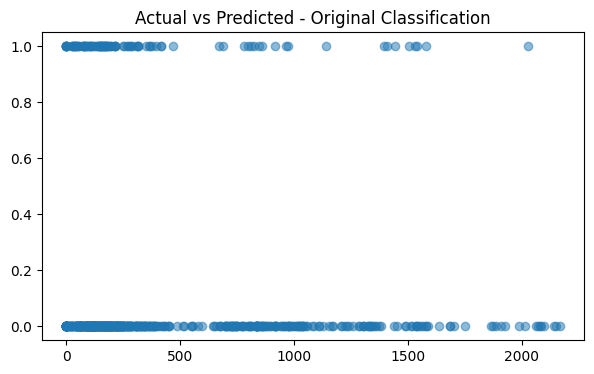


L1 Regularized Classification Model Performance:
MAE: 441.2037
MSE: 435700.7660
RMSE: 660.0763
R2 Score: -0.8076


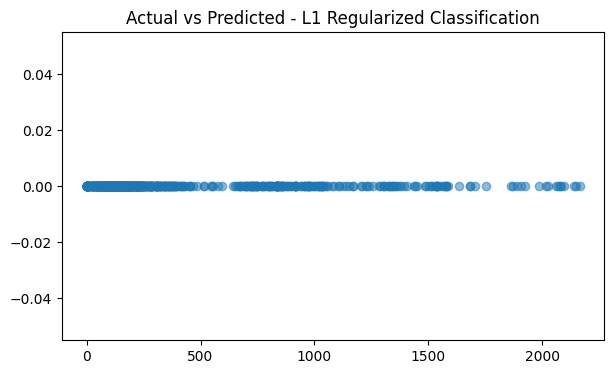


L2 Regularized Classification Model Performance:
MAE: 441.1354
MSE: 435659.9730
RMSE: 660.0454
R2 Score: -0.8074


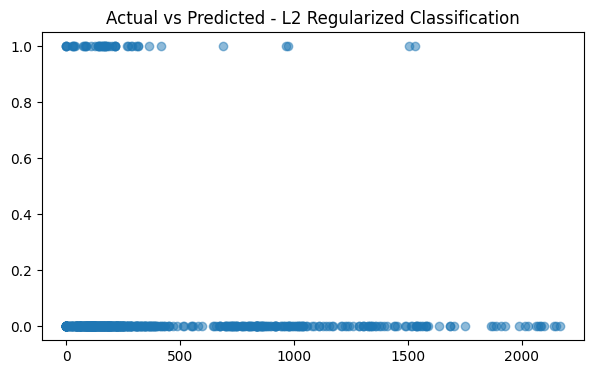


L1_L2 Regularized Classification Model Performance:
MAE: 441.2037
MSE: 435700.7660
RMSE: 660.0763
R2 Score: -0.8076


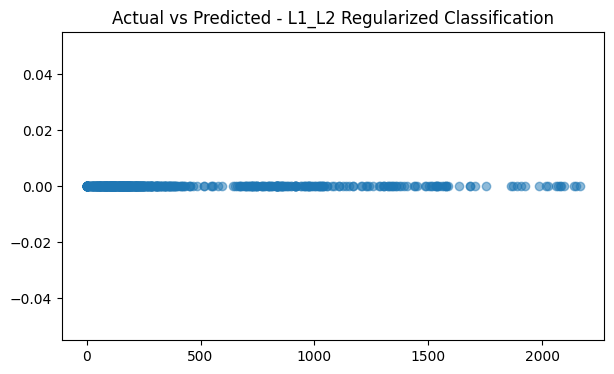


Original Prediction Model Performance:
MAE: 16.0724
MSE: 569.6124
RMSE: 23.8666
R2 Score: 0.9976


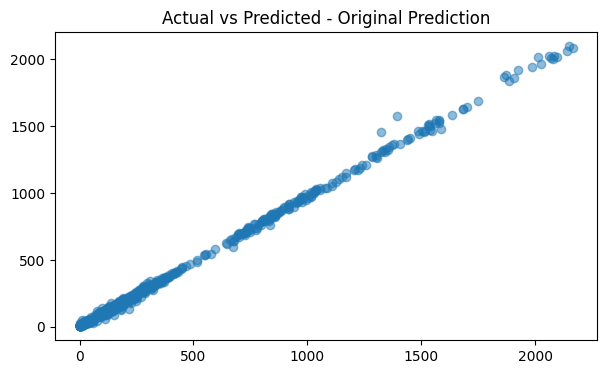


L1 Regularized Prediction Model Performance:
MAE: 13.1062
MSE: 401.8391
RMSE: 20.0459
R2 Score: 0.9983


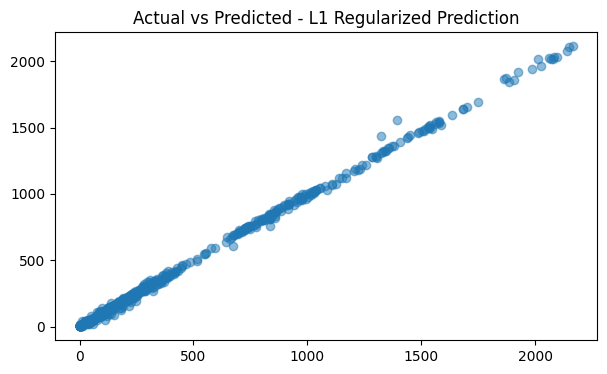


L2 Regularized Prediction Model Performance:
MAE: 23.6774
MSE: 1162.1958
RMSE: 34.0910
R2 Score: 0.9952


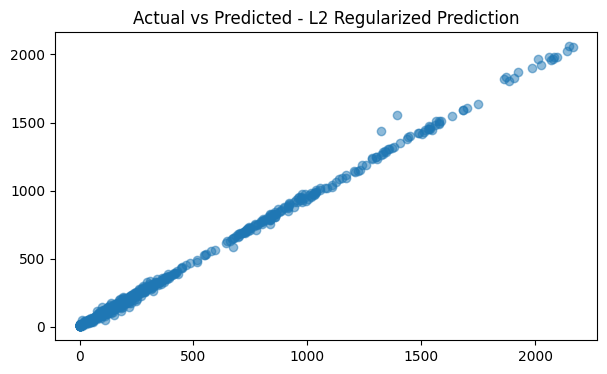


L1_L2 Regularized Prediction Model Performance:
MAE: 14.6318
MSE: 484.8904
RMSE: 22.0202
R2 Score: 0.9980


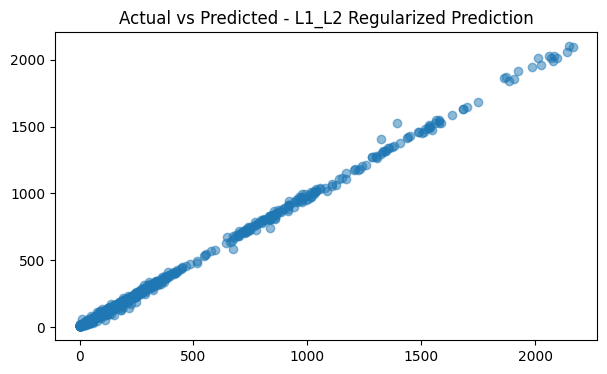

In [41]:
# prompt: compare the models

# Assuming all previous code is executed and the necessary variables are defined

# Create a DataFrame to store the model performance metrics
model_comparison = pd.DataFrame(columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Score', 'Accuracy', 'Precision', 'Recall'])

# Function to add metrics for classification models
def add_classification_metrics(df, y_true, y_pred, model_name):
    report = classification_report(y_true, y_pred, output_dict=True)
    df = df.append({'Model': model_name,
                   'Accuracy': accuracy_score(y_true, y_pred),
                    'Precision': report['1']['precision'],
                    'Recall': report['1']['recall']}, ignore_index=True)
    return df


# Function to add metrics for regression models
def add_regression_metrics(df, y_true, y_pred, model_name):
    df = df.append({'Model': model_name,
                    'MAE': mean_absolute_error(y_true, y_pred),
                    'MSE': mean_squared_error(y_true, y_pred),
                    'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
                    'R2 Score': r2_score(y_true, y_pred)}, ignore_index=True)
    return df


# Add original classification model metrics
model_comparison = add_classification_metrics(model_comparison, y_test, y_pred_original_class, "Original Classification")

# Add L1, L2, and L1_L2 regularized classification model metrics
model_comparison = add_classification_metrics(model_comparison, y_test, (class_model_l1.predict(X_test) > 0.5).astype("int32"), "L1 Regularized Classification")
model_comparison = add_classification_metrics(model_comparison, y_test, (class_model_l2.predict(X_test) > 0.5).astype("int32"), "L2 Regularized Classification")
model_comparison = add_classification_metrics(model_comparison, y_test, (class_model_l1_l2.predict(X_test) > 0.5).astype("int32"), "L1_L2 Regularized Classification")


# Add original regression model metrics
model_comparison = add_regression_metrics(model_comparison, y_test_reg, y_pred_original_reg, "Original Regression")

# Add L1, L2, and L1_L2 regularized regression model metrics
model_comparison = add_regression_metrics(model_comparison, y_test_reg, pred_model_l1.predict(X_test_reg).flatten(), "L1 Regularized Regression")
model_comparison = add_regression_metrics(model_comparison, y_test_reg, pred_model_l2.predict(X_test_reg).flatten(), "L2 Regularized Regression")
model_comparison = add_regression_metrics(model_comparison, y_test_reg, pred_model_l1_l2.predict(X_test_reg).flatten(), "L1_L2 Regularized Regression")

# Display the comparison table
model_comparison
